In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/credit-score-classification/train.csv', low_memory=False)

In [3]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [4]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [5]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [6]:
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [7]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [8]:
# Get unique values from every column
unique_values_per_column = {}
for column in df.columns:
    unique_values_per_column[column] = df[column].unique()

# Print unique values from every column
for column, unique_values in unique_values_per_column.items():
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'ID': ['0x1602' '0x1603' '0x1604' ... '0x25feb' '0x25fec' '0x25fed']
Unique values in column 'Customer_ID': ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']
Unique values in column 'Month': ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']
Unique values in column 'Name': ['Aaron Maashoh' nan 'Rick Rothackerj' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']
Unique values in column 'Age': ['23' '-500' '28_' ... '4808_' '2263' '1342']
Unique values in column 'SSN': ['821-00-0265' '#F%$D@*&8' '004-07-5839' ... '133-16-7738' '031-35-0942'
 '078-73-5990']
Unique values in column 'Occupation': ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
Unique values in column 'Annual_Income': ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']
Unique values in column 'Mo

In [9]:
import re
def remove_special_chars(text):
    pattern = r'_'
    # Check if the text is NaN (or any other representation of NaN)
    if pd.isna(text):
        return np.nan  # Return NaN unchanged
    clean_text = re.sub(pattern, '', str(text))
    return clean_text


In [10]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [11]:
df = df.map(remove_special_chars)

In [12]:
df.replace('', np.nan, inplace = True)

In [13]:
df.drop(['ID', 'Month', 'Name','SSN'], axis = 1, inplace = True)

## Age

In [14]:
df['Age'] = df['Age'].astype(int)

abnormal_age = (df['Age'] < 0) | (df['Age'] > 60)

Customer_Mode_Age = df.groupby('Customer_ID')['Age'].transform(lambda x : x.mode().iloc[0])
df['Age'] = np.where(abnormal_age, Customer_Mode_Age, df['Age'])
df['Age'] = df['Age'].astype(int)

## Occupation

In [15]:
df['Occupation']=df['Occupation'].replace('',np.nan)

Customer_Mode_Occupation = df.groupby('Customer_ID')['Occupation'].transform(lambda x : x.mode().iloc[0])
df['Occupation'] = np.where(df['Occupation'].isnull(), Customer_Mode_Occupation, df['Occupation'])

## Monthly_Inhand_Salary

In [16]:
#df['Monthly_Inhand_Salary']=df['Monthly_Inhand_Salary'].replace('',np.nan)

Customer_Mode_Salary = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda x : x.mode().iloc[0])
df['Monthly_Inhand_Salary'] = np.where(df['Monthly_Inhand_Salary'].isnull(), Customer_Mode_Salary, df['Monthly_Inhand_Salary'])

In [17]:
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].astype(float)

In [18]:
df['Annual_Income'] = df['Annual_Income'].astype(float)

## Num_Bank_Account

In [19]:
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].astype(int)
# Dealing with negative numbers in bank account numbers
abnormal_account = (df['Num_Bank_Accounts'] < 0)
df['Num_Bank_Accounts'] =  np.where(abnormal_account, 0, df['Num_Bank_Accounts'])

# Dealing with abnormal values which are to high to be true
abnormal_accounts = (df['Num_Bank_Accounts'] > 11)

Customer_Mode_Accounts = df.groupby('Customer_ID')['Num_Bank_Accounts'].transform(lambda x : x.mode().iloc[0])
df['Num_Bank_Accounts'] = np.where(abnormal_accounts, Customer_Mode_Accounts, df['Num_Bank_Accounts'])

df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].astype(int)

## Num_Credit_Card

In [20]:
df['Num_Credit_Card'] = df['Num_Credit_Card'].astype(int)

abnormal_cards = (df['Num_Credit_Card'] > 11)

Customer_Mode_Card = df.groupby('Customer_ID')['Num_Credit_Card'].transform(lambda x : x.mode().iloc[0])
df['Num_Credit_Card'] = np.where(abnormal_cards, Customer_Mode_Card, df['Num_Credit_Card'])

df['Num_Credit_Card'] = df['Num_Credit_Card'].astype(int)

## Interest_Rate

In [21]:
df['Interest_Rate'] = df['Interest_Rate'].astype(int)

abnormal_interest = (df['Interest_Rate'] > 34)

Customer_Mode_Interest = df.groupby('Customer_ID')['Interest_Rate'].transform(lambda x : x.mode().iloc[0])
df['Interest_Rate'] = np.where(abnormal_interest, Customer_Mode_Interest, df['Interest_Rate'])

## Num_of_Loan

In [22]:
df['Num_of_Loan'] = df['Num_of_Loan'].astype(int)

abnormal_loan = (df['Num_of_Loan'] > 10) | (df['Num_of_Loan'] < 0 )

Customer_Mode_Loan = df.groupby('Customer_ID')['Num_of_Loan'].transform(lambda x : x.mode().iloc[0])
df['Num_of_Loan'] = np.where(abnormal_loan, Customer_Mode_Loan, df['Num_of_Loan'])

## Delay_from_due_date

In [23]:
df['Delay_from_due_date'] = df['Delay_from_due_date'].astype(int)

abnormal_delay = (df['Delay_from_due_date'] < 0) | (df['Delay_from_due_date'] > 30)

Customer_Mode_Delay = df.groupby('Customer_ID')['Delay_from_due_date'].transform(lambda x : x.mode().iloc[0])
df['Delay_from_due_date'] = np.where(abnormal_delay, Customer_Mode_Delay, df['Delay_from_due_date'])

In [24]:
abnormal_delay = (df['Delay_from_due_date'] < 0) | (df['Delay_from_due_date'] > 30)

df['Delay_from_due_date'] = np.where(abnormal_delay, 0, df['Delay_from_due_date'])

## Num_of_Delayed_Payment

In [25]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(-1)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(int)

abnormal_delay_payment = (df['Num_of_Delayed_Payment'] > 30) | (df['Num_of_Delayed_Payment'] < 0)
    
Customer_Mode_Delay_Payment = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda x : x.mode().iloc[0])
df['Num_of_Delayed_Payment'] = np.where(abnormal_delay_payment, Customer_Mode_Delay_Payment, df['Num_of_Delayed_Payment'])

In [26]:
abnormal_delay_payment = df['Num_of_Delayed_Payment'] < 0
    
Customer_Median_Delay_Payment = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda x : x.median())
df['Num_of_Delayed_Payment'] = np.where(abnormal_delay_payment, Customer_Median_Delay_Payment, df['Num_of_Delayed_Payment'])

In [27]:
abnormal_delay_payment = df['Num_of_Delayed_Payment'] < 0
df['Num_of_Delayed_Payment'] = np.where(abnormal_delay_payment, 0, df['Num_of_Delayed_Payment'])

## Changed_Credit_Limit

In [28]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(float)

abnormal_credit = df['Changed_Credit_Limit'].isna()

Customer_Mode_Credit = df.groupby('Customer_ID')['Changed_Credit_Limit'].transform(lambda x : x.mode().iloc[0])
df['Changed_Credit_Limit'] = np.where(abnormal_credit, Customer_Mode_Credit, df['Changed_Credit_Limit'])

## Num_Credit_Inquiries

In [29]:
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(-1)
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].astype(float).astype(int)

abnormal_inquiries = (df['Num_Credit_Inquiries'] > 30) | (df['Num_Credit_Inquiries'] == -1)

Customer_Mode_Inquiries = df.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(lambda x : x.mode().iloc[0])
df['Num_Credit_Inquiries'] = np.where(abnormal_inquiries, Customer_Mode_Inquiries, df['Num_Credit_Inquiries'])

## Credit_Mix

In [30]:
abnormal_credit_mix = df['Credit_Mix'].isna()

Customer_Mode_Credit_Mix = df.groupby('Customer_ID')['Credit_Mix'].transform(lambda x : x.mode().iloc[0])
df['Credit_Mix'] = np.where(abnormal_credit_mix, Customer_Mode_Credit_Mix, df['Credit_Mix'])

## Outstanding_Debt

In [31]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)

## Credit_Utilization_Ratio

In [32]:
df['Credit_Utilization_Ratio'] = df['Credit_Utilization_Ratio'].astype(float)

## Payment_of_Min_Amount

In [33]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace('NM', 'No')

## Credit_History_Age

In [34]:
df['Credit_History_Age'] = df['Credit_History_Age'].fillna(0)

df['Credit_History_Age'] = df['Credit_History_Age'].astype(str)

df['History_Age'] = df['Credit_History_Age'].apply(lambda x: int(x.split()[0]) * 12 + int(x.split()[3]) if len(x.split()) == 5 else 0)
#df['Month'] = df['Credit_History_Age'].str.split(" ",n = 4).str[3]

In [35]:
df['History_Age'] = df['History_Age'].astype(int)

In [36]:
df['History_Age'] = df['History_Age'].replace(0,np.nan)

In [37]:
# Group by 'Customer_ID' and perform index interpolation
df['History_Age'] = df.groupby('Customer_ID')['History_Age'].transform(
    lambda x: x.interpolate(method='index', limit_direction='both') if x.count() > 1 else x)

In [38]:
df['History_Age'].head(20)

0     265.0
1     266.0
2     267.0
3     268.0
4     269.0
5     270.0
6     271.0
7     271.0
8     319.0
9     320.0
10    321.0
11    322.0
12    323.0
13    324.0
14    325.0
15    326.0
16    213.0
17    214.0
18    215.0
19    216.0
Name: History_Age, dtype: float64

In [39]:
df = df.drop(['Credit_History_Age'], axis = 1)

## Total_EMI_per_month

In [40]:
df['Total_EMI_per_month'] = df['Total_EMI_per_month'].astype(float)

## Amount_invested_monthly

In [41]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].replace('10000', np.nan)

In [42]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(float)

## Payment_Behaviour

In [43]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8', np.nan)

In [44]:
df['Payment_Behaviour'].isna().sum()

7600

## Monthly_Balance

In [45]:
df['Monthly_Balance'] = df['Monthly_Balance'].astype(float)

# EDA

In [46]:
df.columns

Index(['Customer_ID', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score', 'History_Age'],
      dtype='object')

In [47]:
df['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

<Axes: xlabel='Credit_Score', ylabel='count'>

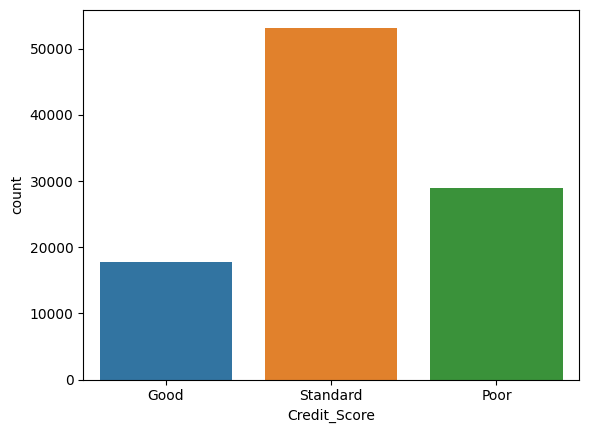

In [48]:
sns.countplot(x = 'Credit_Score', data = df)

<Axes: xlabel='Age', ylabel='count'>

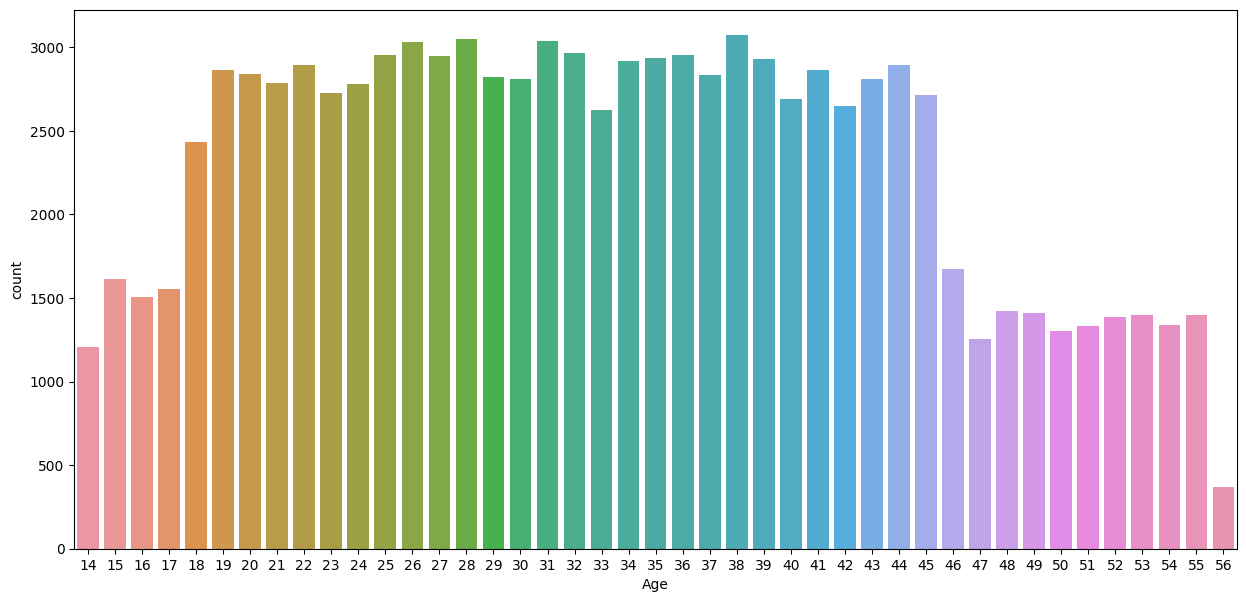

In [49]:
plt.figure(figsize=(15,7))
sns.countplot(x = 'Age', data = df)

In [50]:
df['Occupation'].value_counts()

Occupation
Lawyer          7096
Engineer        6864
Architect       6824
Mechanic        6776
Scientist       6744
Accountant      6744
Developer       6720
MediaManager    6720
Teacher         6672
Entrepreneur    6648
Doctor          6568
Journalist      6536
Manager         6432
Musician        6352
Writer          6304
Name: count, dtype: int64

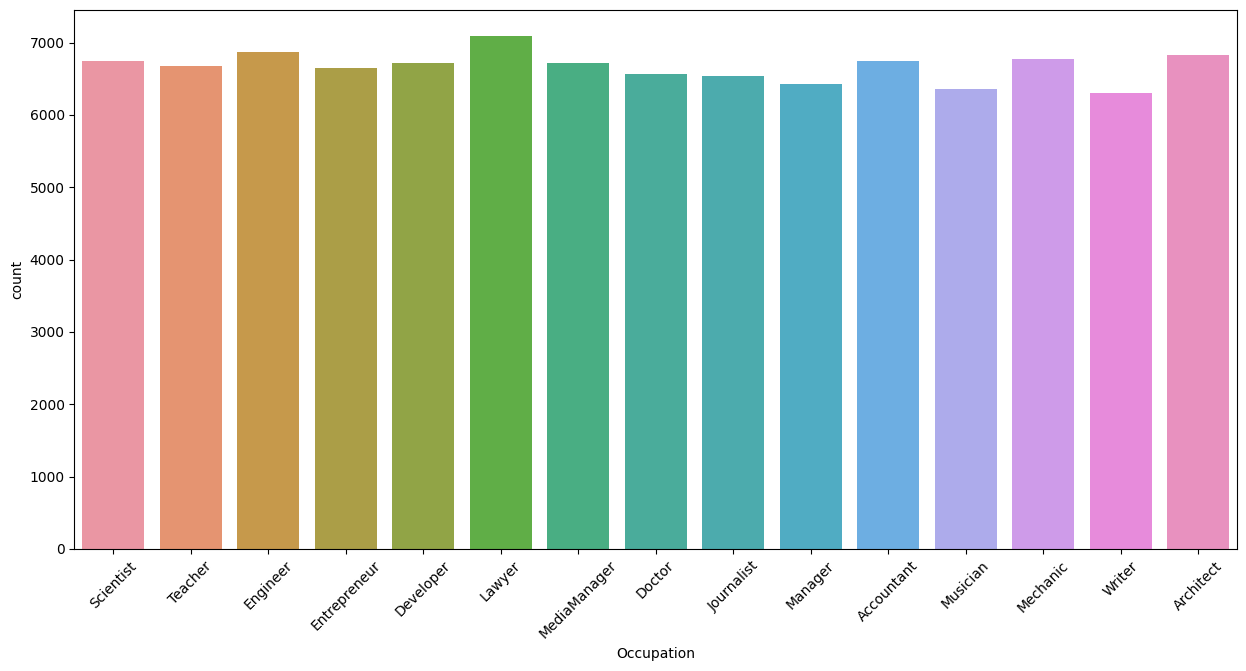

In [51]:
plt.figure(figsize=(15,7))
plot = sns.countplot(x = 'Occupation', data = df)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 45)
plt.show()

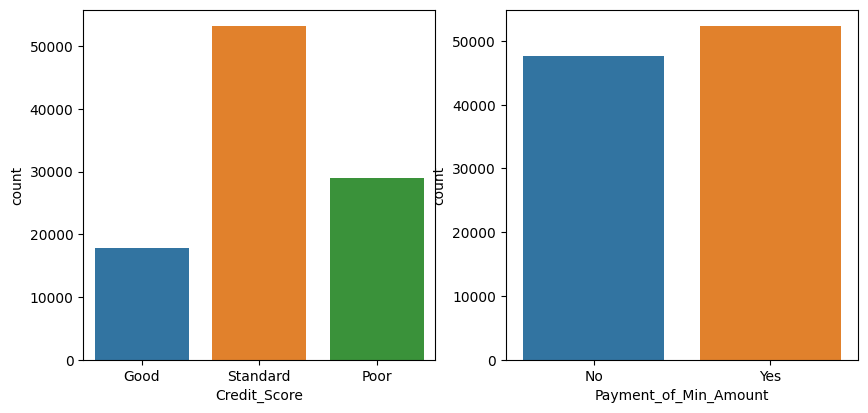

In [52]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plot = sns.countplot(x = 'Credit_Score', data = df)
plt.subplot(222)
plot = sns.countplot(x = 'Payment_of_Min_Amount', data = df)

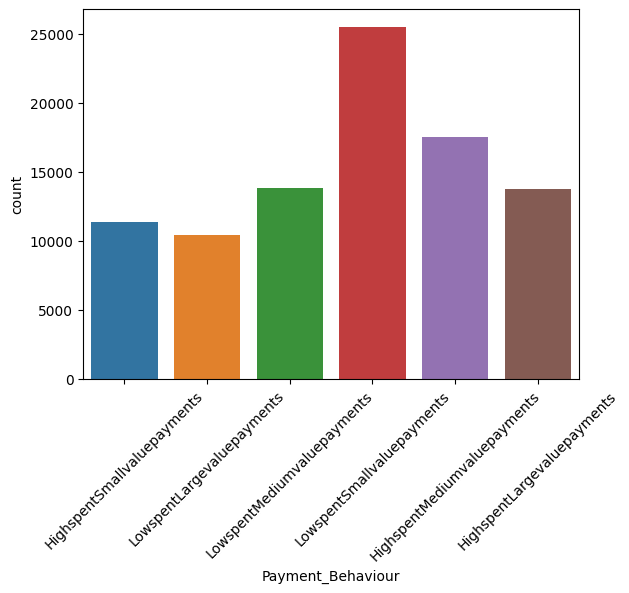

In [53]:
plot = sns.countplot(x = 'Payment_Behaviour', data = df)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 45)
plt.show()

<Axes: xlabel='Num_Credit_Card', ylabel='count'>

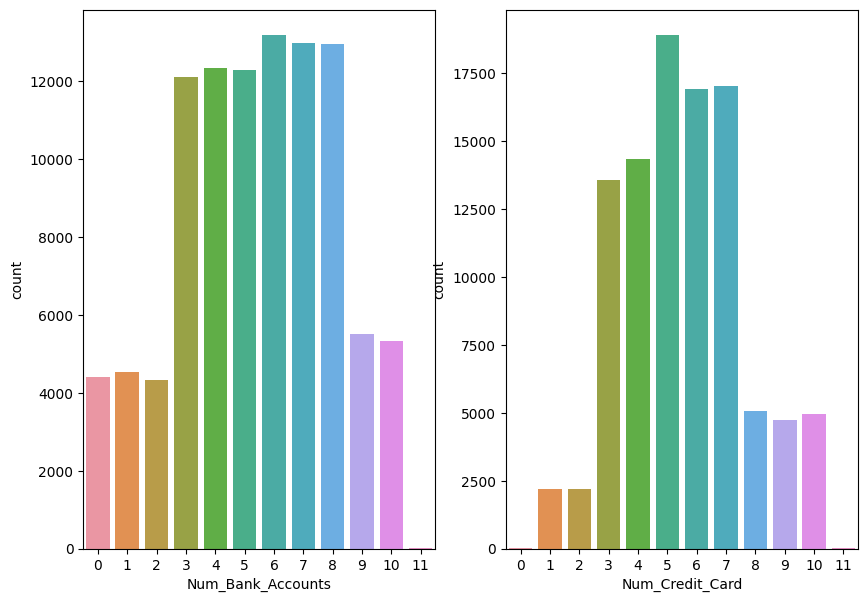

In [54]:
plt.figure(figsize = (10,7))
plt.subplot(121)
sns.countplot(x = 'Num_Bank_Accounts', data = df)
plt.subplot(122)
sns.countplot(x = 'Num_Credit_Card', data = df)

<Axes: xlabel='Interest_Rate', ylabel='count'>

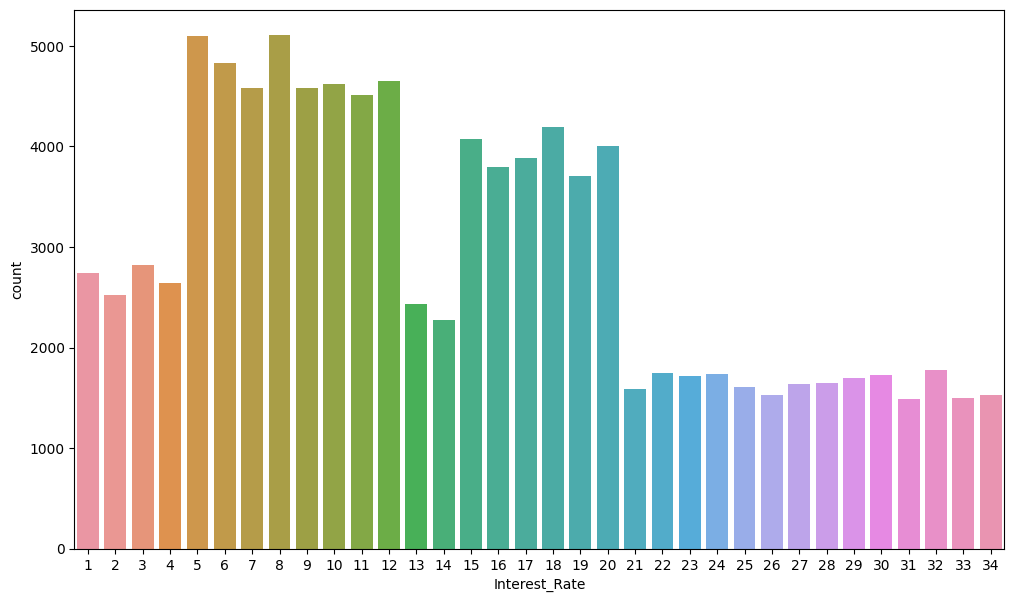

In [55]:
plt.figure(figsize = (12,7))
sns.countplot(x = 'Interest_Rate', data = df)

<Axes: xlabel='Num_of_Loan', ylabel='count'>

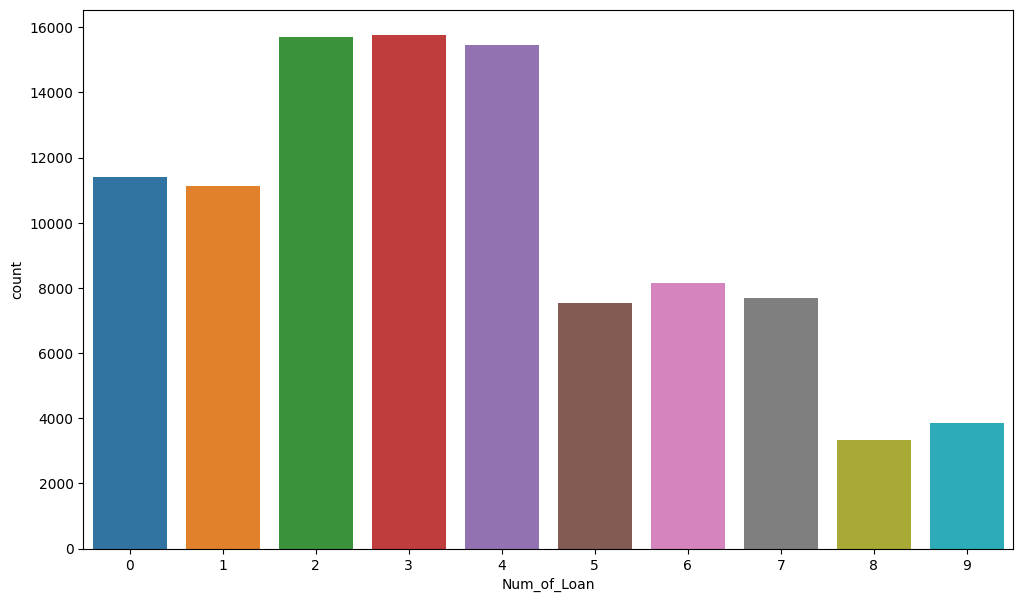

In [56]:
plt.figure(figsize = (12,7))
sns.countplot(x = 'Num_of_Loan', data = df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Monthly_Inhand_Salary', ylabel='Count'>

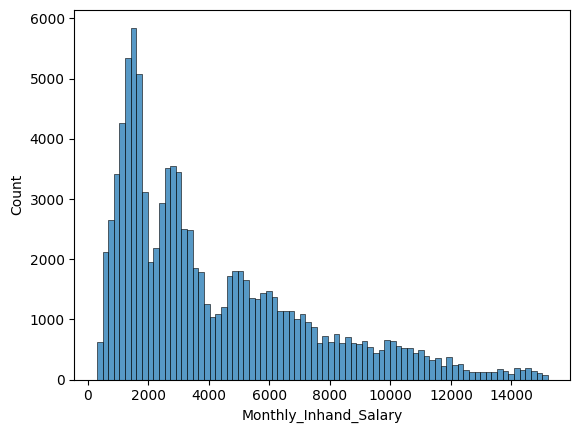

In [57]:
sns.histplot(df['Monthly_Inhand_Salary'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Num_Bank_Accounts', ylabel='Count'>

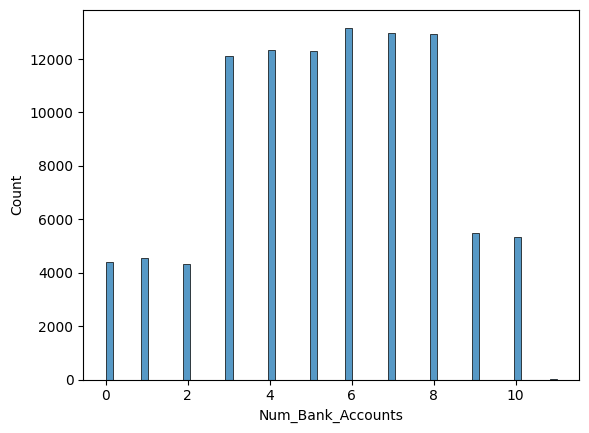

In [58]:
sns.histplot(df['Num_Bank_Accounts'])

In [59]:
df['Type_of_Loan'].value_counts().head(20)

Type_of_Loan
Not Specified                               1408
Credit-Builder Loan                         1280
Personal Loan                               1272
Debt Consolidation Loan                     1264
Student Loan                                1240
Payday Loan                                 1200
Mortgage Loan                               1176
Auto Loan                                   1152
Home Equity Loan                            1136
Personal Loan, and Student Loan              320
Not Specified, and Payday Loan               272
Mortgage Loan, and Home Equity Loan          264
Student Loan, and Payday Loan                256
Credit-Builder Loan, and Not Specified       248
Student Loan, and Credit-Builder Loan        248
Payday Loan, and Auto Loan                   240
Payday Loan, and Debt Consolidation Loan     240
Payday Loan, and Student Loan                232
Personal Loan, and Credit-Builder Loan       232
Mortgage Loan, and Not Specified             232
Name: c

In [60]:
df['Type_of_Loan'] = df['Type_of_Loan'].astype(str)

In [61]:
df['Loan_Type'] = df['Type_of_Loan'].str.split(',', n=1).str[0]

df['Loan_Type'] = df['Loan_Type'].replace('nan', np.nan)

In [62]:
df['Loan_Type'].value_counts()

Loan_Type
Credit-Builder Loan        10416
Payday Loan                10248
Personal Loan              10200
Not Specified               9848
Student Loan                9672
Debt Consolidation Loan     9648
Mortgage Loan               9632
Auto Loan                   9568
Home Equity Loan            9360
Name: count, dtype: int64

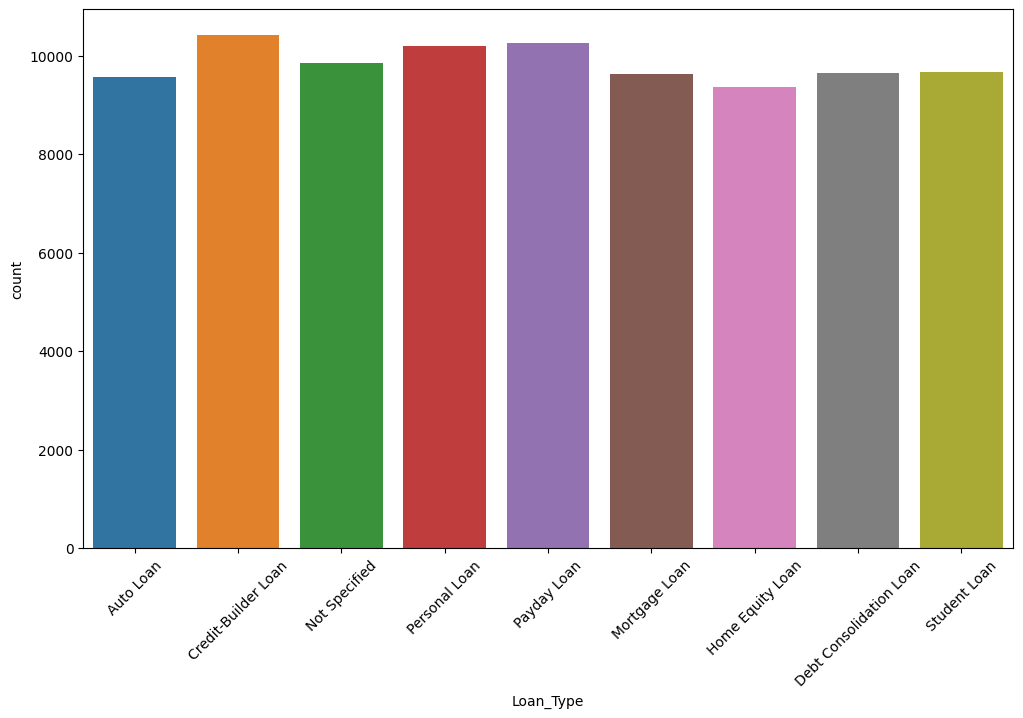

In [63]:
plt.figure(figsize = (12,7))
plot = sns.countplot(x = 'Loan_Type', data = df)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 45)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Axes: xlabel='Credit_Utilization_Ratio', ylabel='Count'>

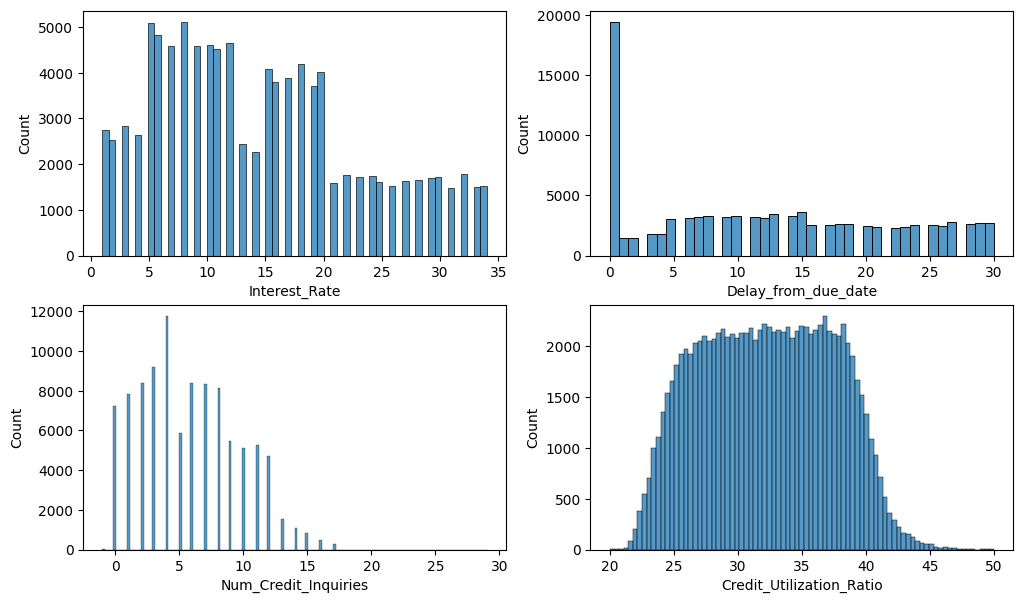

In [64]:
plt.figure(figsize = (12,7))
plt.subplot(221)
sns.histplot(x = 'Interest_Rate', data = df)
plt.subplot(222)
sns.histplot(x = 'Delay_from_due_date', data = df)
plt.subplot(223)
sns.histplot(x = 'Num_Credit_Inquiries', data = df)
plt.subplot(224)
sns.histplot(x = 'Credit_Utilization_Ratio', data = df)

## Annual_Income

<Axes: xlabel='Annual_Income'>

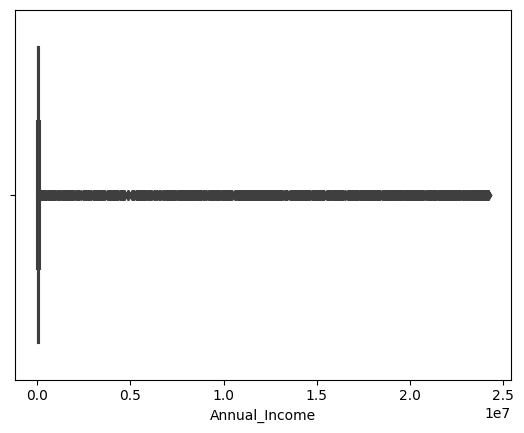

In [65]:
sns.boxplot(x = 'Annual_Income', data = df)

In [66]:
Q1 = df["Annual_Income"].quantile(0.25)
Q3 = df["Annual_Income"].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

In [67]:
df[df['Annual_Income'] > upper_bound].head()
## there are some error in annual income we can fill it with right income 

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,History_Age,Loan_Type
54,CUS0x284a,34,Lawyer,10909427.0,10469.207759,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",...,352.16,26.947565,No,911.220179,930.391898,NaN,326.241830,Good,373.0,Credit-Builder Loan
231,CUS0xbffe,40,Architect,6515990.0,2210.032500,6,3,15,3,"Payday Loan, Not Specified, and Auto Loan",...,400.07,23.177617,Yes,69.602920,51.830859,HighspentLargevaluepayments,339.569471,Standard,370.0,Payday Loan
245,CUS0x9a71,55,Scientist,586359.0,1684.168333,1,5,1,2,"Auto Loan, and Home Equity Loan",...,413.32,28.836349,No,29.534584,68.956725,HighspentMediumvaluepayments,319.925525,Good,224.0,Auto Loan
361,CUS0x8e9b,15,Entrepreneur,18334118.0,4369.482500,10,10,18,8,"Student Loan, Home Equity Loan, Payday Loan, D...",...,3422.49,36.729939,Yes,314.901785,124.541470,HighspentSmallvaluepayments,257.504994,Standard,126.0,Student Loan
368,CUS0x609d,27,Architect,19717385.0,1057.435833,7,10,33,9,"Credit-Builder Loan, Personal Loan, Credit-Bui...",...,2797.17,25.314339,Yes,58.868441,60.550786,HighspentSmallvaluepayments,246.324357,Standard,167.0,Credit-Builder Loan


In [68]:
abnormal_income = df['Annual_Income'] > upper_bound

Customer_Mode_Income = df.groupby('Customer_ID')['Annual_Income'].transform(lambda x : x.mode().iloc[0])
df['Annual_Income'] = np.where(abnormal_income, Customer_Mode_Income, df['Annual_Income'])

<Axes: xlabel='Annual_Income'>

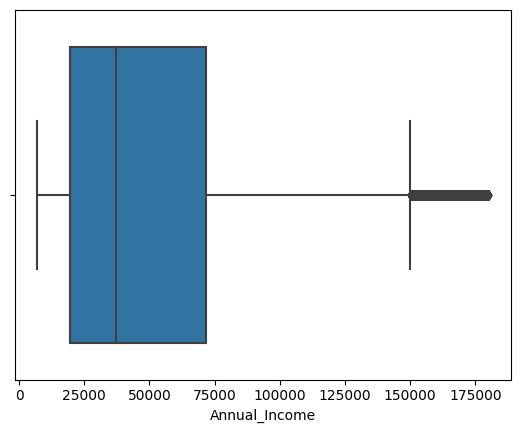

In [69]:
sns.boxplot(x = 'Annual_Income', data = df)
## Now these are the real outliers

## Monthly_Inhand_Salary

<Axes: xlabel='Monthly_Inhand_Salary'>

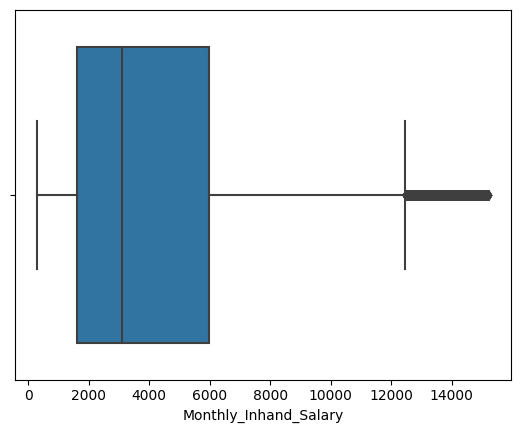

In [70]:
sns.boxplot(x = 'Monthly_Inhand_Salary', data = df)

In [71]:
Q1 = df["Monthly_Inhand_Salary"].quantile(0.25)
Q3 = df["Monthly_Inhand_Salary"].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

In [72]:
df[df['Monthly_Inhand_Salary'] > upper_bound].head()
## There is no abnormal value

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,History_Age,Loan_Type
1728,CUS0x2c31,30,Musician,173196.32,14258.026667,4,7,9,1,Home Equity Loan,...,967.23,37.228795,No,107.8109,366.618610,HighspentLargevaluepayments,1191.373157,Good,341.0,Home Equity Loan
1729,CUS0x2c31,30,Musician,173196.32,14258.026667,4,7,9,1,Home Equity Loan,...,967.23,34.109317,No,107.8109,459.575633,HighspentMediumvaluepayments,1108.416134,Good,342.0,Home Equity Loan
1730,CUS0x2c31,30,Musician,173196.32,14258.026667,4,7,9,1,Home Equity Loan,...,967.23,40.809043,No,107.8109,283.691353,HighspentMediumvaluepayments,1284.300414,Good,343.0,Home Equity Loan
1731,CUS0x2c31,30,Musician,173196.32,14258.026667,4,7,9,1,Home Equity Loan,...,967.23,38.556001,No,107.8109,138.673720,HighspentLargevaluepayments,1419.318047,Good,344.0,Home Equity Loan
1732,CUS0x2c31,30,Musician,173196.32,14258.026667,4,7,9,1,Home Equity Loan,...,967.23,32.884290,No,107.8109,368.082693,HighspentSmallvaluepayments,1209.909074,Good,345.0,Home Equity Loan


## Total_EMI_per_month

In [73]:
Q1 = df["Total_EMI_per_month"].quantile(0.25)
Q3 = df["Total_EMI_per_month"].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

<Axes: xlabel='Total_EMI_per_month'>

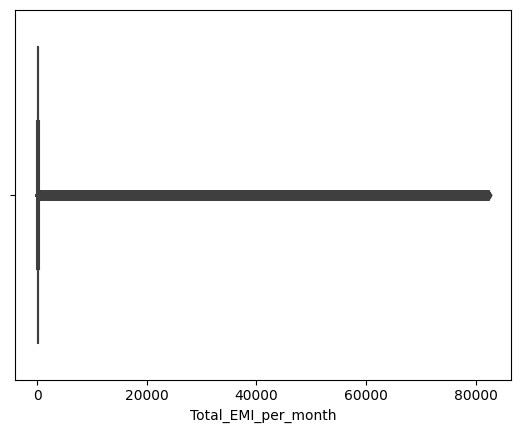

In [74]:
sns.boxplot(x = 'Total_EMI_per_month', data = df)

In [75]:
df[df['Total_EMI_per_month'] > upper_bound].head()
## There are some abnormal values.

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,History_Age,Loan_Type
40,CUS0x95ee,31,Lawyer,73928.46,5988.705000,4,5,8,0,nan,...,548.20,39.962685,No,15015.000000,98.674410,HighspentLargevaluepayments,740.196090,Good,384.0,NaN
45,CUS0x95ee,31,Lawyer,73928.46,5988.705000,4,5,8,0,nan,...,548.20,35.275437,No,15515.000000,235.790325,LowspentLargevaluepayments,633.080175,Good,388.0,NaN
50,CUS0x284a,34,Lawyer,131313.40,10469.207759,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",...,352.16,31.803134,No,911.220179,188.064321,HighspentLargevaluepayments,1038.569407,Good,369.0,Credit-Builder Loan
51,CUS0x284a,34,Lawyer,131313.40,10469.207759,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",...,352.16,42.645785,No,23834.000000,337.434956,HighspentMediumvaluepayments,899.198772,Good,370.0,Credit-Builder Loan
52,CUS0x284a,34,Lawyer,131313.40,10469.207759,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",...,352.16,40.902517,No,32662.000000,263.378909,HighspentLargevaluepayments,963.254819,Good,371.0,Credit-Builder Loan


In [76]:
abnormal_emi = df['Total_EMI_per_month'] > upper_bound

Customer_Mode_EMI = df.groupby('Customer_ID')['Total_EMI_per_month'].transform(lambda x : x.mode().iloc[0])
df['Total_EMI_per_month'] = np.where(abnormal_emi, Customer_Mode_EMI, df['Total_EMI_per_month'])

## Payment_Behaviour

In [77]:
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
LowspentSmallvaluepayments      25513
HighspentMediumvaluepayments    17540
LowspentMediumvaluepayments     13861
HighspentLargevaluepayments     13721
HighspentSmallvaluepayments     11340
LowspentLargevaluepayments      10425
Name: count, dtype: int64

In [78]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].fillna('NA')

## Amount_Invested_Monthly

In [79]:
null_value = df['Amount_invested_monthly'].isna()

Customer_Mean_Investment = df.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda x : x.mean())
df['Amount_invested_monthly'] = np.where(null_value, Customer_Mean_Investment, df['Amount_invested_monthly'])

## Monthly_Balance

In [80]:
null_value = df['Monthly_Balance'].isna()

Customer_Mean_Balance = df.groupby('Customer_ID')['Monthly_Balance'].transform(lambda x : x.mean())
df['Monthly_Balance'] = np.where(null_value, Customer_Mean_Balance, df['Monthly_Balance'])

## Loan_Type

In [81]:
df['Loan_Type'] = df['Loan_Type'].fillna('NA')

# Preprocessing 

In [82]:
df.isnull().sum()

Customer_ID                 0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
History_Age                 0
Loan_Type                   0
dtype: int64

## Removing unnecessary column

In [83]:
df = df.drop(['Customer_ID', 'Type_of_Loan'], axis = 1)

## OneHot Encoding for categorical columns

In [84]:
df_encoded = pd.get_dummies(df, columns=['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Loan_Type'], dtype=int, drop_first = True)

## LabelEncoding for output column

In [85]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_encoded['Credit_Score'] = label_encoder.fit_transform(df_encoded['Credit_Score'])

In [86]:
df_heatmap = df.drop(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Loan_Type'], axis = 1)

In [87]:
df_heatmap['Credit_Score'] = df_encoded['Credit_Score']


<Axes: >

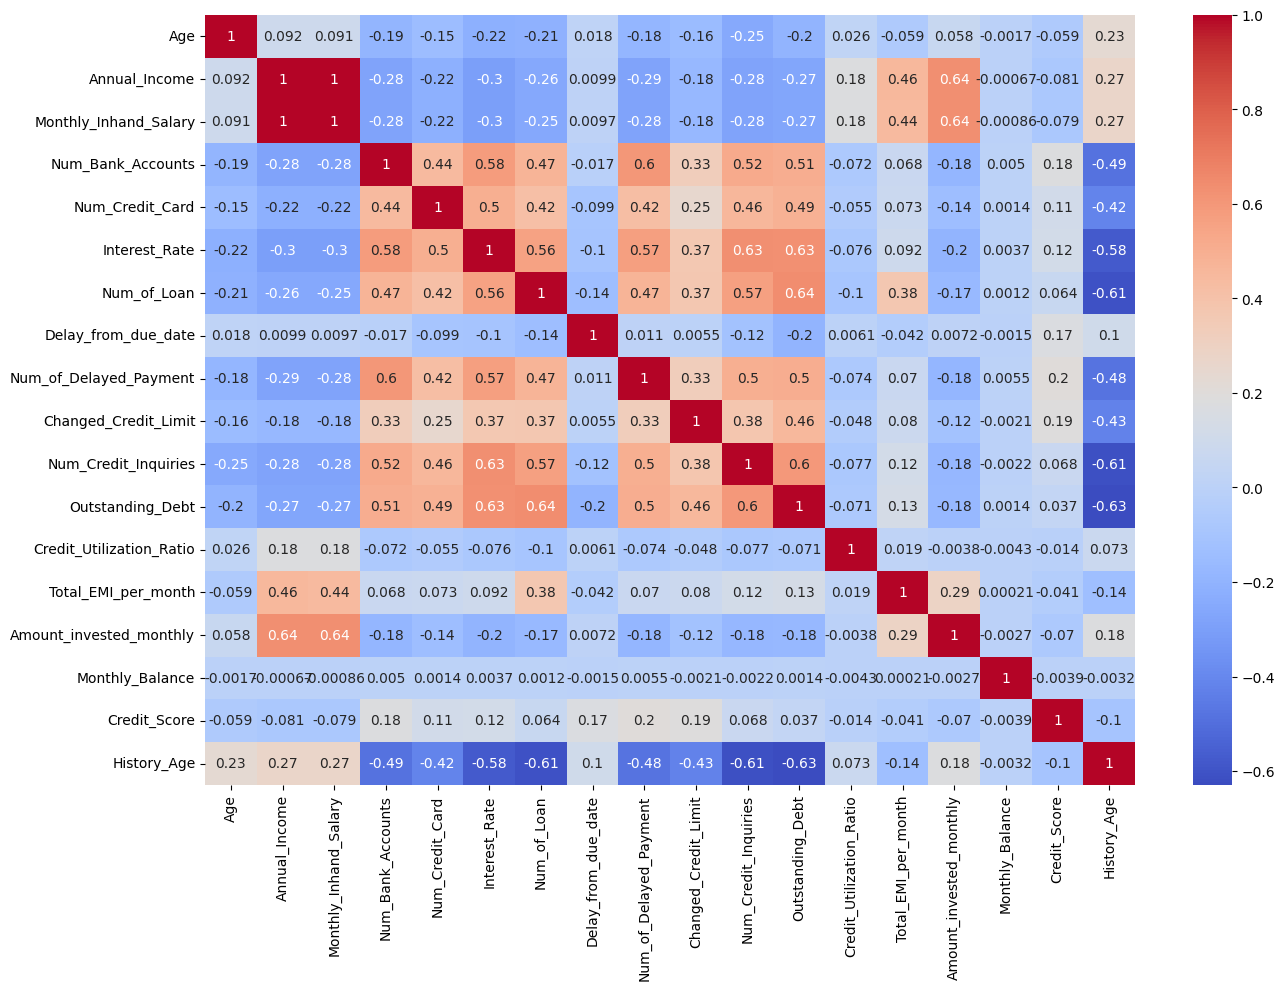

In [88]:
plt.figure(figsize = (15,10))
sns.heatmap(df_heatmap.corr(), annot=True, cmap='coolwarm')

# Feature Selection

## Feature Removal
1. Monthly_Balance
2. Credit_Utilization_Ratio
3. Outstanding_Debt
4. Monthly_Inhand_Salary

In [89]:
df_encoded = df_encoded.drop(['Monthly_Balance','Credit_Utilization_Ratio','Outstanding_Debt','Monthly_Inhand_Salary'], axis = 1)

## TrainTestSplit

In [90]:
X = df_encoded.drop('Credit_Score', axis = 1)
y = df_encoded['Credit_Score']

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [92]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (80000, 45) (80000,)
Testing set shape: (20000, 45) (20000,)


## Balancing the Imbalanced dataset

In [93]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto')

In [94]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [95]:
X_train = X_resampled
y_train = y_resampled

In [96]:
y_train.value_counts()

Credit_Score
2    42575
0    42575
1    42575
Name: count, dtype: int64

## Normalization

In [97]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [98]:
X_train = pd.DataFrame(X_train_scaled)
X_test = pd.DataFrame(X_test_scaled)

# Model

## ANN

In [99]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import l2

2024-03-20 17:27:28.298831: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-20 17:27:28.299027: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-20 17:27:28.511293: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [100]:
model = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.25),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.25),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.25),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.25),
    Dense(3, activation='softmax')
])

In [101]:
model.compile(optimizer = Adam(learning_rate=0.00001), 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

early_stopping = EarlyStopping(monitor = 'val_accuracy', patience = 10, restore_best_weights = True)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               11776     
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In [102]:
history = model.fit(X_train, y_train, epochs = 200, validation_split = 0.2, callbacks = [early_stopping])

Epoch 1/200
3194/3194 [==============================] - 23s 6ms/step - loss: 6.1222 - accuracy: 0.5132 - val_loss: 5.7843 - val_accuracy: 0.5780
Epoch 2/200
3194/3194 [==============================] - 19s 6ms/step - loss: 5.6707 - accuracy: 0.5917 - val_loss: 5.6899 - val_accuracy: 0.5284
Epoch 3/200
3194/3194 [==============================] - 20s 6ms/step - loss: 5.3425 - accuracy: 0.6128 - val_loss: 5.4718 - val_accuracy: 0.5361
Epoch 4/200
3194/3194 [==============================] - 20s 6ms/step - loss: 5.0452 - accuracy: 0.6281 - val_loss: 5.2816 - val_accuracy: 0.5223
Epoch 5/200
3194/3194 [==============================] - 20s 6ms/step - loss: 4.7721 - accuracy: 0.6329 - val_loss: 5.0120 - val_accuracy: 0.5452
Epoch 6/200
3194/3194 [==============================] - 20s 6ms/step - loss: 4.5018 - accuracy: 0.6426 - val_loss: 4.8321 - val_accuracy: 0.5263
Epoch 7/200
3194/3194 [==============================] - 20s 6ms/step - loss: 4.2525 - accuracy: 0.6491 - val_loss: 4.5579 -

In [103]:
model.evaluate(X_test, y_test)

625/625 [==============================] - 2s 3ms/step - loss: 0.9597 - accuracy: 0.6941


[0.9597466588020325, 0.694100022315979]

In [104]:
Y_pred_prob = model.predict(X_test)

625/625 [==============================] - 2s 2ms/step


# Ploting the training and validation loss curves 

In [105]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

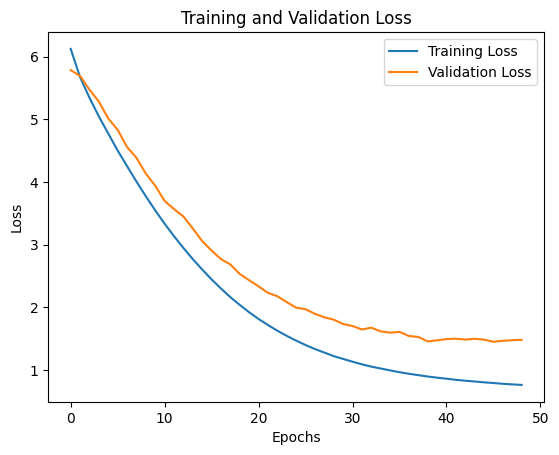

In [106]:
epochs = range(1, len(train_loss) + 1)
plt.plot(train_loss, label = 'Training Loss')
plt.plot(val_loss, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## Confusion Matrix

In [107]:
from sklearn.metrics import confusion_matrix

In [108]:
y_pred_prob = model.predict(X_test)

625/625 [==============================] - 2s 2ms/step


In [109]:
y_pred = np.argmax(y_pred_prob, axis=1)

In [110]:
print(confusion_matrix(y_test, y_pred))

[[2855   70  602]
 [ 674 3654 1546]
 [1932 1294 7373]]


In [111]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.81      0.64      3527
           1       0.73      0.62      0.67      5874
           2       0.77      0.70      0.73     10599

    accuracy                           0.69     20000
   macro avg       0.68      0.71      0.68     20000
weighted avg       0.72      0.69      0.70     20000



## Keras Hyperparameter Tuner

In [112]:
from keras.utils import to_categorical
y_train_encoded = to_categorical(y_train, num_classes = 3)
y_test_encoded = to_categorical(y_test, num_classes = 3)

In [113]:
import keras
import keras_tuner
from keras import layers

In [114]:
def build_model(hp):
    model = keras.Sequential()
    model.add(
        layers.Dense(
            # Tune number of units.
            units=hp.Int("units", min_value=32, max_value=512, step=32),
            # Tune the activation function to use.
            activation=hp.Choice("activation", ["relu"]),
        )
    )
    # Tune whether to use dropout.
    if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=0.25))
    model.add(layers.Dense(3, activation="softmax"))
    # Define the optimizer learning rate as a hyperparameter.
    learning_rate = hp.Float("lr", min_value=1e-5, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model


build_model(keras_tuner.HyperParameters())

In [115]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=20,
    executions_per_trial=3,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)

In [116]:
tuner.search(X_train, y_train_encoded, batch_size = 128, epochs=10, validation_split = 0.2)

Trial 20 Complete [00h 01m 48s]
val_accuracy: 0.6005350152651469

Best val_accuracy So Far: 0.6441965103149414
Total elapsed time: 00h 31m 55s


In [117]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 1e-05, 'conditions': [], 'min_value': 1e-05, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [118]:
tuner.get_best_hyperparameters()

In [119]:
best_hps = tuner.get_best_hyperparameters()

In [120]:
model = build_model(best_hps[0])

In [121]:
model.fit(X_train, y_train_encoded, epochs=1, shuffle = True)

3992/3992 [==============================] - 9s 2ms/step - loss: 0.7221 - accuracy: 0.7069


In [122]:
model.evaluate(X_test, y_test_encoded)

625/625 [==============================] - 1s 2ms/step - loss: 0.7684 - accuracy: 0.6571


[0.7683547139167786, 0.6571499705314636]